# Analyze the Popularity of Programming Langauges

A DataCamp Project in R

By Madison Martin 

<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine how the relative popularity of R, Python, Java, and JavaScript has changed over time.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question, such as the programming language|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

# Project Intructions 

1. What was the percentage of R questions for 2020?Save the result in a data frame, r_2020, containing five columns: year, tag, num_questions, year_total, and percentage.
   
2. Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020 (inclusive).Save the tag names as highest_tags. This variable can be a character vector, tibble, or data frame (if the latter, please use the column name tag).

Bonus: try visualizing the data along the way! 

# My Solution

In [26]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [27]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
# What percentage of R questions for 2020?
# make new df by filtering for questions with R tags 
r_questions <- data %>% 
filter(tag == "r") %>% 
# create new percentage variable with mutate 
mutate(percentage = num_questions / year_total * 100)

# look at our work 
r_questions

year,tag,num_questions,year_total,percentage
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2008,r,8,168541,0.00474662
2009,r,523,981124,0.05330621
2010,r,2264,1970729,0.11488135
2011,r,5835,3473395,0.16799126
2012,r,12183,4787010,0.25450124
2013,r,22256,6037170,0.36864955
2014,r,30923,6431458,0.48080855
2015,r,40704,6612772,0.61553612
2016,r,44365,6593600,0.67284943


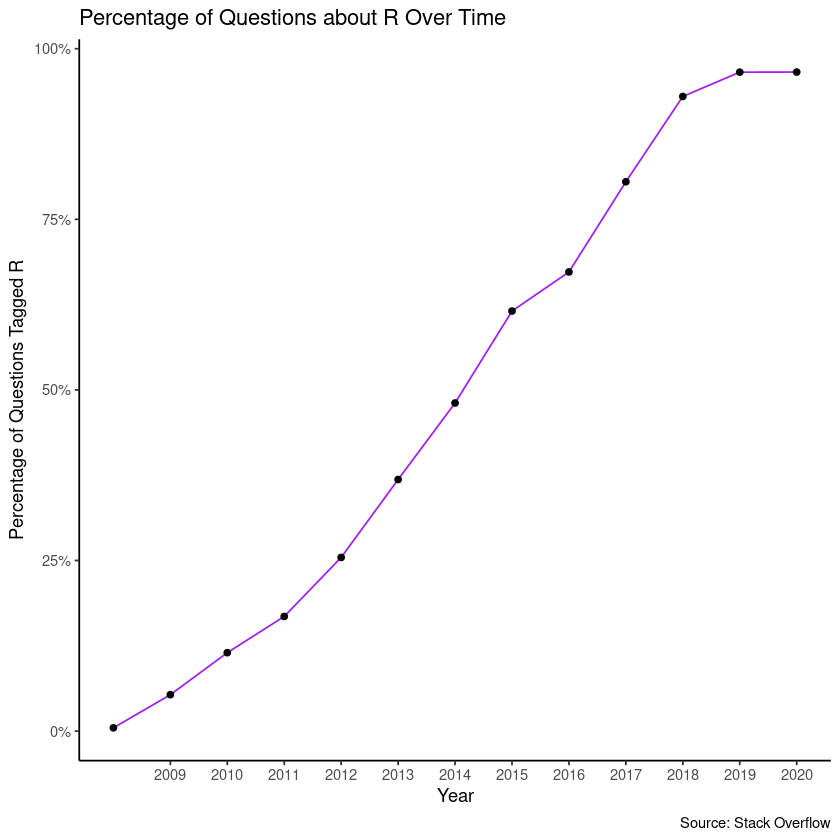

In [29]:
# viz percentage of r questions over time 
r_questions %>% 
ggplot(mapping = aes(x = year, y = percentage)) + 
geom_line(colour = "purple") + 
geom_point() +
scale_x_continuous(breaks = 2009:2020) + # change the year labels to integers as they should be
scale_y_continuous(labels = scales::percent_format(scale = 100)) + # change labels to accurately show percentage
theme_classic() + 
labs(
	title = "Percentage of Questions about R Over Time", 
	x = "Year", 
	y = "Percentage of Questions Tagged R", 
	caption = "Source: Stack Overflow"
)

In [30]:
# calculate the percentage of all questions in 2020 that were tagged with R 
r_2020 <- r_questions %>% 
filter(year == 2020) 

r_2020

#calculate the percentage as a numeric variable 
r_percentage <- r_percentage_table$num_questions / r_percentage_table$year_total * 100
r_percentage

year,tag,num_questions,year_total,percentage
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2020,r,52662,5452545,0.9658242


[1] 0.9658242

From the graph created above, the popularity of questions about programming with R has increased a lot over the timeframe represented in this data. By 2020, 96.6% of questions were tagged as R. 

In [31]:
# find the 5 programming language tags with the highest total questions asked from 2015-2020 
# first we need to filter the data for those years 
year_df <- data %>% 
filter(year >= 2015) %>% 
#group by tag and then sum, the sort descending 
group_by(tag) %>% 
summarize(total_questions = sum(num_questions)) %>% 
arrange(desc(total_questions)) 


# turn results into vector 
highest_tags <- head(year_df$tag, n =  5)

highest_tags

[1] "javascript" "python"     "java"       "android"    "c#"

# Additional Analysis

I'm actually not sure if I agree with the premise of this project, so I want to create a few more visualizations and reflect on the data. 

In [32]:
# want to see the top 5 programming language tags over the entire course of the dataset 
top_tags <- data %>% 
group_by(tag) %>% 
summarize(total_questions = sum(num_questions)) %>% 
arrange(desc(total_questions)) %>% 
head(n = 5)

top_tags

tag,total_questions
<chr>,<dbl>
javascript,2097190
java,1717955
python,1549328
c#,1439011
php,1373159


The top 5 most tagged questions from 2008 to 2020 are different than those from 2015-2020 (calculated in the question above). Specifically, instead of c# here we see php. 

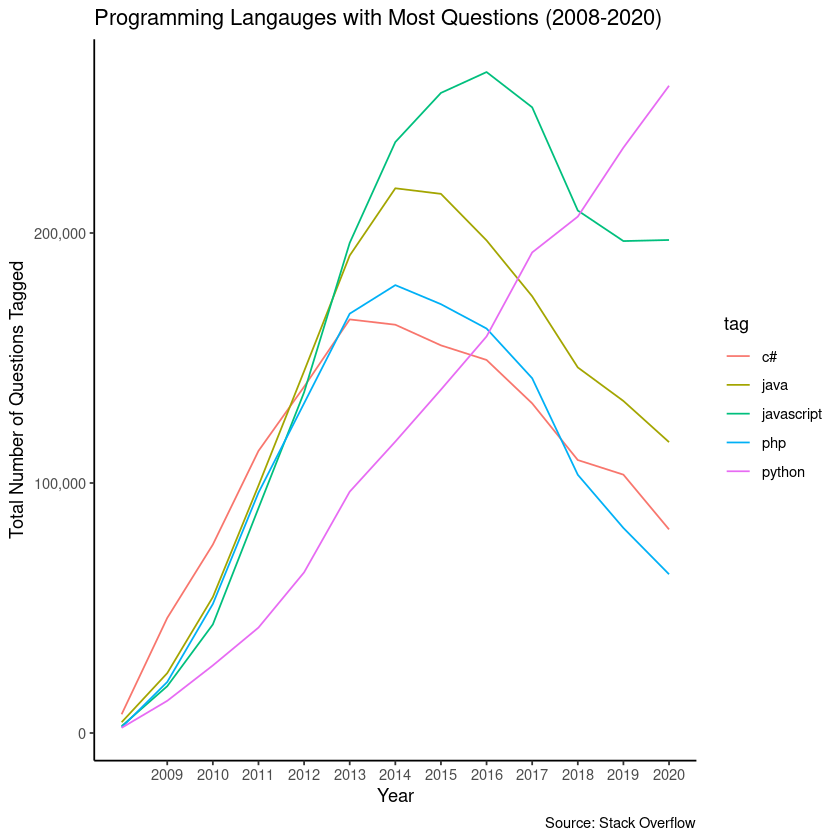

In [53]:
# viz of top tags over whole time frame 
top_5_tags <- data %>% 
  filter(tag %in% c("javascript", "java", "python", "c#", "php"))

# viz 
ggplot(data = top_5_tags, aes(x = year, y = num_questions, color = tag)) + 
geom_line() + 
scale_x_continuous(breaks = 2009:2020) + # change the year labels to integers as they should be
scale_y_continuous(labels = scales::comma) + # change labels from scientific notation to normal integers
theme_classic() + 
labs(
	title = "Programming Langauges with Most Questions (2008-2020)", 
	x = "Year", 
	y = "Total Number of Questions Tagged", 
	caption = "Source: Stack Overflow"
)

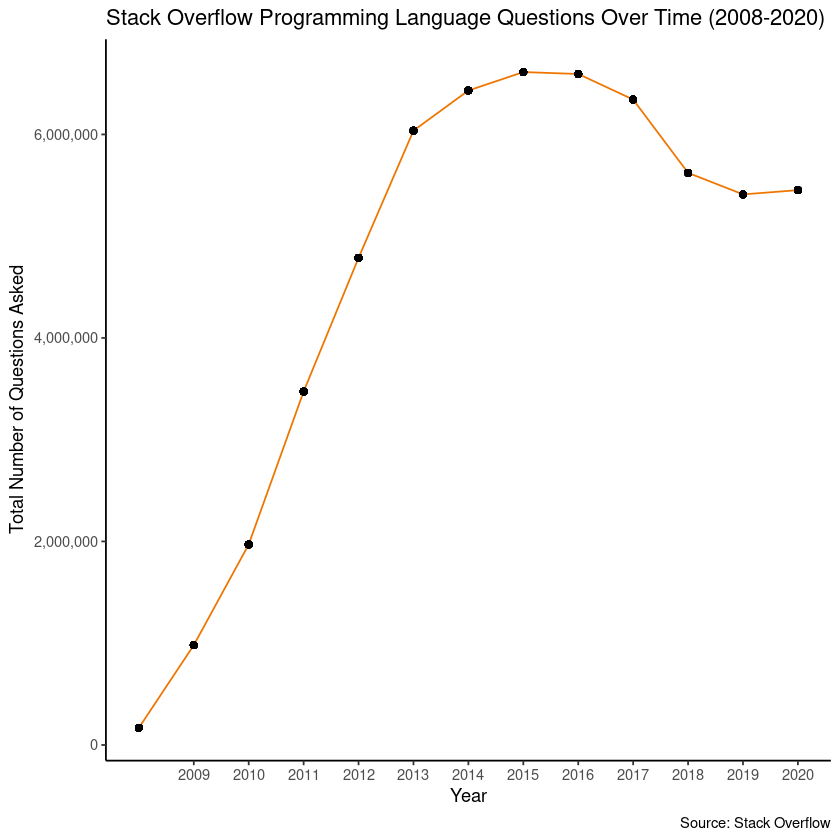

In [63]:
# also want to see how total number of questions asked is fluctuating over time 
ggplot(data = data, aes(x = year, y = year_total)) + 
geom_line(color = "darkorange2") + # to match stack overflow logo 
geom_point() +
scale_x_continuous(breaks = 2009:2020) + # change the year labels to integers as they should be
scale_y_continuous(labels = scales::comma) + # change labels from scientific notation to normal integers
theme_classic() + 
labs(
	title = "Stack Overflow Programming Language Questions Over Time (2008-2020)", 
	x = "Year", 
	y = "Total Number of Questions Asked", 
	caption = "Source: Stack Overflow"
)

While the graph above (Programming Langauges with Most Questions (2008-2020)) is able to show the trends of how many questions were being tagged with the top 5 most represented programming languages in the entire dataset, I question how accurately this reflects the popularity or desirability of each programming language as the premise of this project implies. While the amount of questions posted on Stack Overflow in a certain langauge could indicate how many people are using the language, I think it could also indicate which languges are more difficult to learn/have less publicly available teaching resources, or which langauges have a higher influx of new learners. For example, HTML and SQL do not appear anywhere in the most tagged questions in this dataset. However, according to Stack Overflow's own annual developer survey, HTML/CSS and Python are two of the three most popular langauges (https://stackoverflow.blog/2025/01/01/developers-want-more-more-more-the-2024-results-from-stack-overflow-s-annual-developer-survey/). 

If I were to redesign this project, I would instead measure mentions of programming languages in job descriptions in various fields to see which are most desirable, and potentially which are the best use of your time to learn. 